In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

un_emp = pd.read_csv("unemploymentdata_2020.csv")
un_emp.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [2]:
un_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [3]:
un_emp['Date'] = pd.to_datetime(un_emp['Date'])

C:\Users\aami\AppData\Local\Temp\ipykernel_10448\2851103677.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  un_emp['Date'] = pd.to_datetime(un_emp['Date'])


In [4]:
summary = un_emp['Estimated Unemployment Rate (%)'].describe()

In [5]:
trend_analysis_bydate = un_emp.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
summary, trend_analysis_bydate

(count    267.000000
 mean      12.236929
 std       10.803283
 min        0.500000
 25%        4.845000
 50%        9.650000
 75%       16.755000
 max       75.850000
 Name: Estimated Unemployment Rate (%), dtype: float64,
 Date
 2020-01-31     9.196538
 2020-02-29     9.266154
 2020-03-31    10.782593
 2020-04-30    22.236154
 2020-05-31    23.244444
 2020-06-30    10.911111
 2020-07-31     9.834444
 2020-08-31    10.313333
 2020-09-30     8.705926
 2020-10-31     8.026296
 Name: Estimated Unemployment Rate (%), dtype: float64)

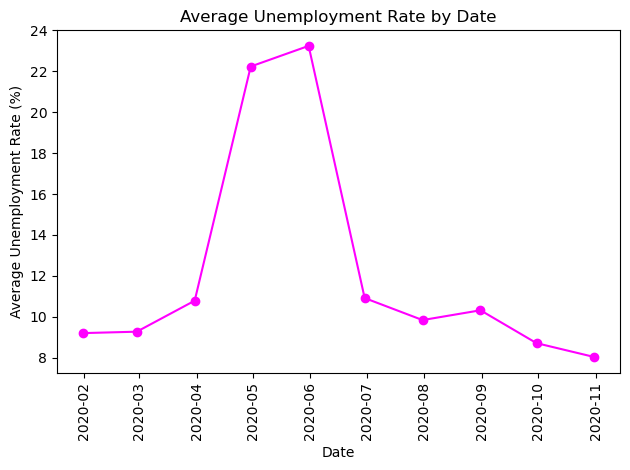

In [6]:
plt.plot(trend_analysis_bydate.index,trend_analysis_bydate.values, linestyle='-', marker = 'o', color = 'magenta')
plt.xlabel('Date')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Average Unemployment Rate by Date')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [7]:
trend_analysis_byregion = un_emp.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
trend_analysis_byregion.head()

Region
Andhra Pradesh     8.664
Assam              4.856
Bihar             19.471
Chhattisgarh       7.819
Delhi             18.414
Name: Estimated Unemployment Rate (%), dtype: float64

[]

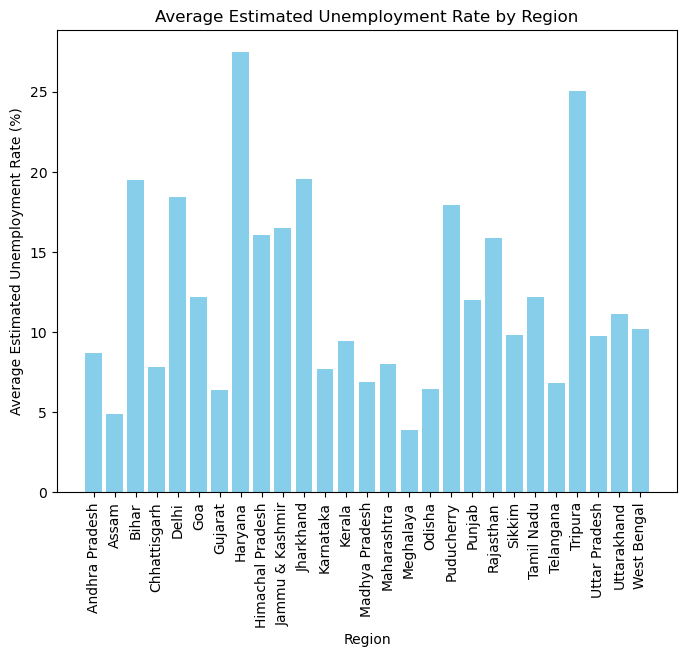

In [8]:
plt.figure(figsize=(8,6))
plt.bar(trend_analysis_byregion.index, trend_analysis_byregion.values, color = 'skyblue')
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.title('Average Estimated Unemployment Rate by Region')
plt.plot()

In [9]:
pivot_data = un_emp.pivot(index = 'Date', columns = 'Region', values = 'Estimated Unemployment Rate (%)')
pivot_data.head()

Region,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,5.48,4.66,10.61,9.65,22.23,8.89,5.54,20.34,16.83,21.08,...,0.58,11.11,10.97,NaN,1.57,5.49,32.67,7.58,5.49,6.94
2020-02-29,5.83,4.41,10.29,8.38,14.84,2.81,6.38,25.77,16.84,20.78,...,1.76,10.97,15.16,NaN,2.09,8.29,28.40,8.98,4.99,4.92
2020-03-31,5.79,4.77,15.43,7.54,17.04,5.25,6.66,25.05,18.76,15.50,...,1.20,10.32,11.90,23.57,6.40,5.77,29.95,10.11,19.85,6.92
2020-04-30,20.51,11.06,46.64,3.41,16.68,13.31,18.71,43.22,2.20,NaN,...,75.85,2.86,17.70,2.28,49.83,6.25,41.23,21.54,6.48,17.41
2020-05-31,17.43,9.55,45.96,10.50,42.27,21.25,12.11,29.02,26.95,18.74,...,58.19,28.33,15.74,24.51,33.16,14.70,21.51,20.41,8.01,17.41


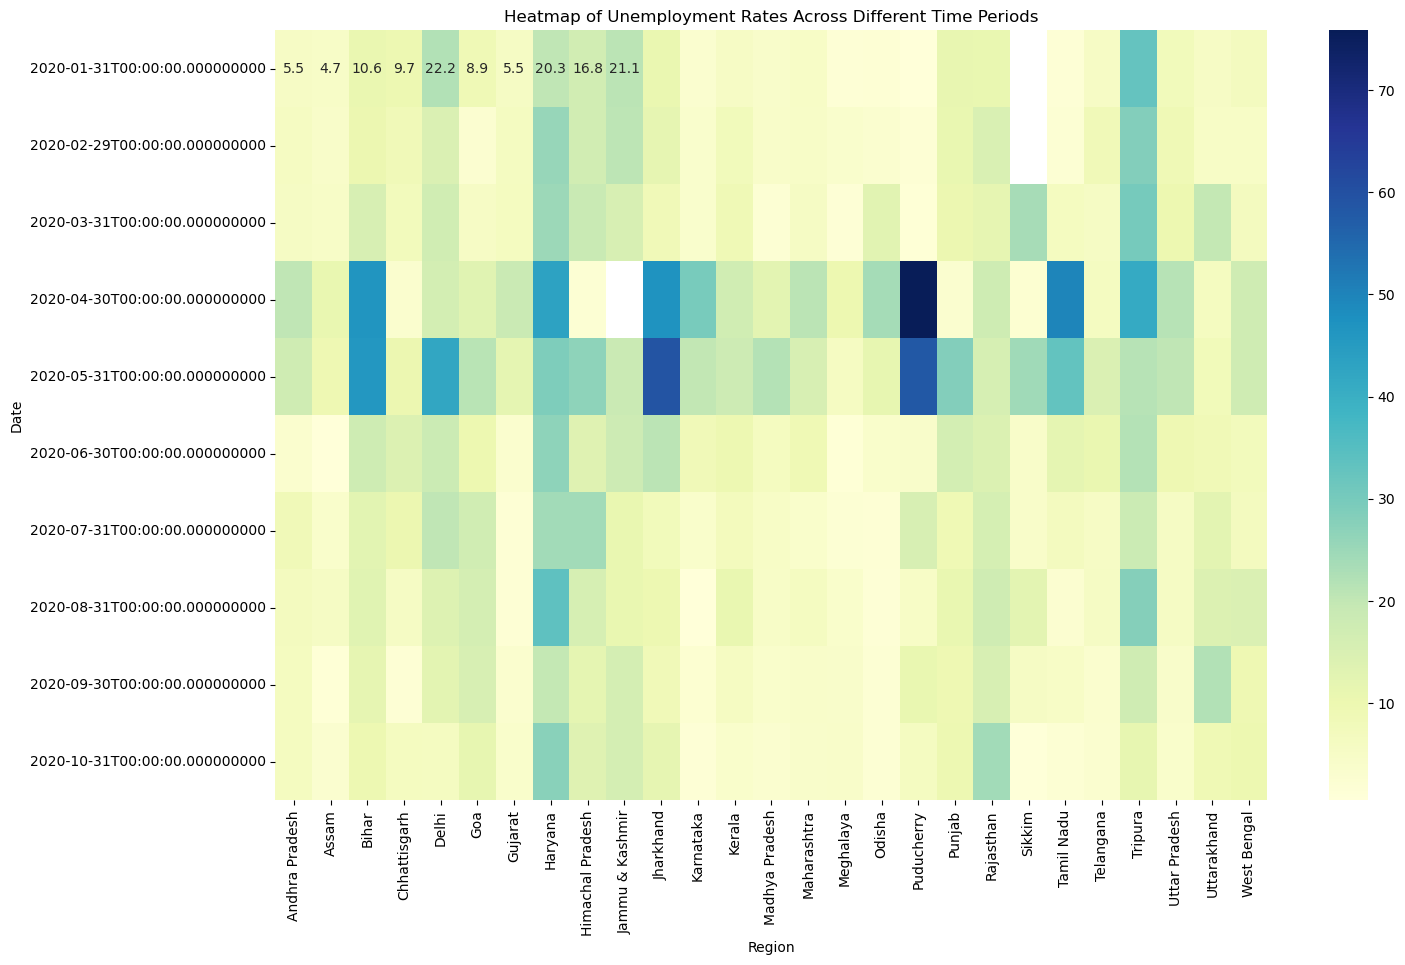

In [10]:
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Heatmap of Unemployment Rates Across Different Time Periods')
plt.xlabel('Region')
plt.ylabel('Date')
plt.show()